In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install squarify

In [ ]:
import squarify

In [ ]:
# NYquery2023
dataset = pd.read_csv('/content/drive/MyDrive/NYquery2023.csv')

In [ ]:
dataset

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-11T11:59:15.755Z,32.69,-109.13,5.00,2.80,ml,23,70.00,0.14,0.64,...,2023-09-11T12:13:19.040Z,"4 km SSW of Duncan, Arizona",earthquake,2.12,1.97,0.06,40.00,reviewed,us,us
1,2023-09-11T11:32:28.490Z,31.66,-104.38,4.13,2.90,ml,19,60.00,0.05,0.20,...,2023-09-11T11:47:42.041Z,"57 km S of Whites City, New Mexico",earthquake,0.84,1.40,0.10,13.00,reviewed,tx,tx
2,2023-09-11T09:35:33.400Z,39.30,-122.80,1.99,2.77,md,38,86.00,0.18,0.14,...,2023-09-11T10:12:16.378Z,"18 km SE of Lake Pillsbury, CA",earthquake,0.30,2.09,0.14,36.00,automatic,nc,nc
3,2023-09-11T09:30:57.250Z,39.88,-121.00,-1.17,2.51,md,20,55.00,0.37,0.30,...,2023-09-11T09:57:15.295Z,"8 km SW of Quincy, CA",earthquake,0.71,3.60,0.13,10.00,automatic,nc,nc
4,2023-09-11T07:17:49.880Z,39.87,-121.00,-1.11,2.57,md,19,61.00,0.38,0.31,...,2023-09-11T18:02:00.008Z,"9 km SSW of Quincy, CA",earthquake,0.71,5.22,0.15,12.00,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,2023-01-01T09:07:25.940Z,35.82,-121.35,3.74,2.60,md,42,176.00,0.10,0.13,...,2023-03-11T22:51:29.040Z,"24km NW of San Simeon, CA",earthquake,0.38,0.77,0.14,44.00,reviewed,nc,nc
1715,2023-01-01T06:49:10.190Z,36.59,-121.21,7.74,3.90,mw,70,72.00,0.03,0.13,...,2023-04-05T16:10:51.335Z,"9km NW of Pinnacles, CA",earthquake,0.16,0.33,NaN,5.00,reviewed,nc,nc
1716,2023-01-01T06:19:31.410Z,36.60,-121.20,8.14,3.14,ml,67,66.00,0.03,0.10,...,2023-04-05T16:40:38.255Z,"9km NW of Pinnacles, CA",earthquake,0.14,0.30,0.15,58.00,reviewed,nc,nc
1717,2023-01-01T05:18:17.780Z,40.70,-124.21,18.47,2.70,md,30,154.00,0.01,0.14,...,2023-04-05T16:43:13.238Z,"3km SSW of Humboldt Hill, CA",earthquake,0.41,0.28,0.11,35.00,reviewed,nc,nc


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1719 non-null   object 
 1   latitude         1719 non-null   float64
 2   longitude        1719 non-null   float64
 3   depth            1719 non-null   float64
 4   mag              1719 non-null   float64
 5   magType          1719 non-null   object 
 6   nst              1719 non-null   int64  
 7   gap              1719 non-null   float64
 8   dmin             1705 non-null   float64
 9   rms              1719 non-null   float64
 10  net              1719 non-null   object 
 11  id               1719 non-null   object 
 12  updated          1719 non-null   object 
 13  place            1673 non-null   object 
 14  type             1719 non-null   object 
 15  horizontalError  1612 non-null   float64
 16  depthError       1719 non-null   float64
 17  magError      

In [ ]:
# ## Let's visualise the Earthquakes by Magnitude, to understand it in a better way

# sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
# my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

# # plt.subplots(figsize=(16,6))

# # plt.subplot(1,2,1)

# # plt.title('Earthquakes by Magnitude : Treemap',fontsize=16)
# # labels = dataset['mag'].value_counts().index.get_level_values(0).tolist()
# # sizes = dataset['mag'].value_counts().reset_index().mag.values.tolist()

# # squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
# # plt.axis('off')

# # plt.subplot(1,2,2)
# plt.title('Earthquakes by Magnitude : Countplot', fontsize=16)
# ax = sns.countplot(x='mag', data=dataset, palette=my_col, alpha=0.3)
# for p in ax.patches:
#         ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 2), ha='center', va='bottom')
# plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# plt.show()

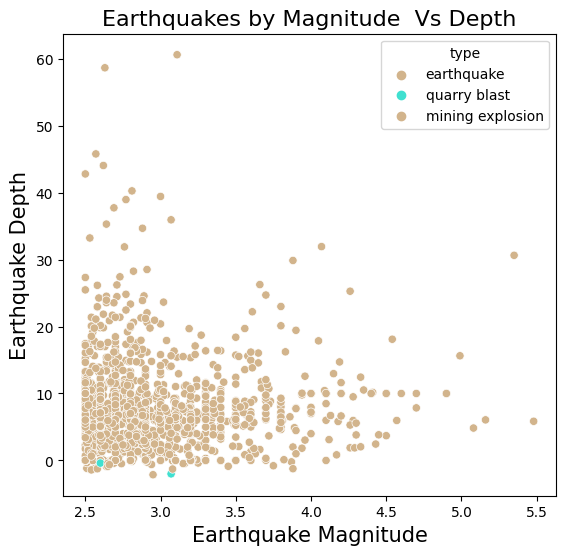

In [ ]:
## Let's understand the relationship between magnitude vs depth and magnitude vs Significance

plt.subplots(figsize=(14,6))
my_pal = ('#D2B48C','#40E0D0')

plt.subplot(1,2,1)
plt.title('Earthquakes by Magnitude  Vs Depth',fontsize=16)
sns.scatterplot(data=dataset, x='mag', y='depth', hue='type', palette=my_pal)
plt.ylabel('Earthquake Depth', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

# plt.subplot(1,2,2)
# plt.title('Earthquakes by Magnitude Vs Significance ',fontsize=16)
# sns.scatterplot(data=dataset, x='mag', y='sig', hue='magType', palette=my_pal)
# plt.ylabel('Earthquake Significance', fontsize=15)
# plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.show()

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['time']).dt.date
dataset['Year'] = pd.to_datetime(dataset['time']).dt.year
dataset['Month'] = pd.to_datetime(dataset['time']).dt.month
dataset['Day'] = pd.to_datetime(dataset['time']).dt.day
dataset['Hour'] = pd.to_datetime(dataset['time']).dt.hour

In [ ]:
dataset[['time', 'Date', 'Year', 'Month', 'Day', 'Hour']].head(5)

,time,Date,Year,Month,Day,Hour
0,2023-09-11T11:59:15.755Z,2023-09-11,2023,9,11,11
1,2023-09-11T11:32:28.490Z,2023-09-11,2023,9,11,11
2,2023-09-11T09:35:33.400Z,2023-09-11,2023,9,11,9
3,2023-09-11T09:30:57.250Z,2023-09-11,2023,9,11,9
4,2023-09-11T07:17:49.880Z,2023-09-11,2023,9,11,7


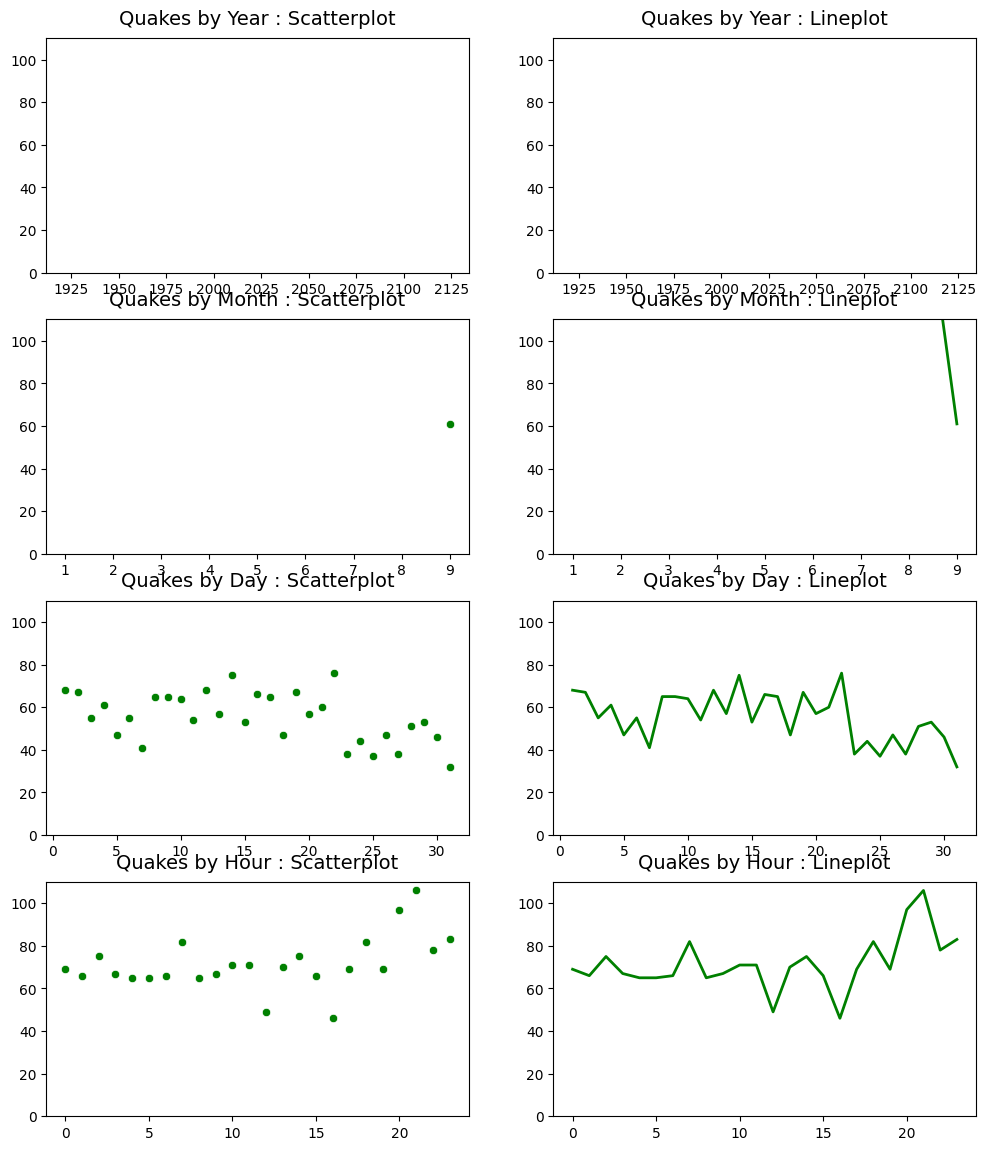

In [ ]:
plt.subplots(figsize=(12,14))

## By Year
###########

plt.subplot(421)
plt.title('Quakes by Year : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = dataset['Year'].value_counts().sort_values(), color='g')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(422)
plt.title('Quakes by Year : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = dataset['Year'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Month
###########

plt.subplot(423)
plt.title('Quakes by Month : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = dataset['Month'].value_counts().sort_values(), color='g')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(424)
plt.title('Quakes by Month : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = dataset['Month'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Day
###########

plt.subplot(425)
plt.title('Quakes by Day : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = dataset['Day'].value_counts().sort_values(), color='g')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(426)
plt.title('Quakes by Day : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = dataset['Day'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Hour
###########

plt.subplot(427)
plt.title('Quakes by Hour : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = dataset['Hour'].value_counts().sort_values(), color='g')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(428)
plt.title('Quakes by Hour : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = dataset['Hour'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.show()

In [ ]:
# plt.title('Quakes by Year : Scatterplot', pad = 10, fontsize = 14)
# sns.scatterplot(data = dataset['Year'].value_counts().sort_values(), color='g')
# plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

In [ ]:
# !pip install pygmt
# import pygmt

In [ ]:
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

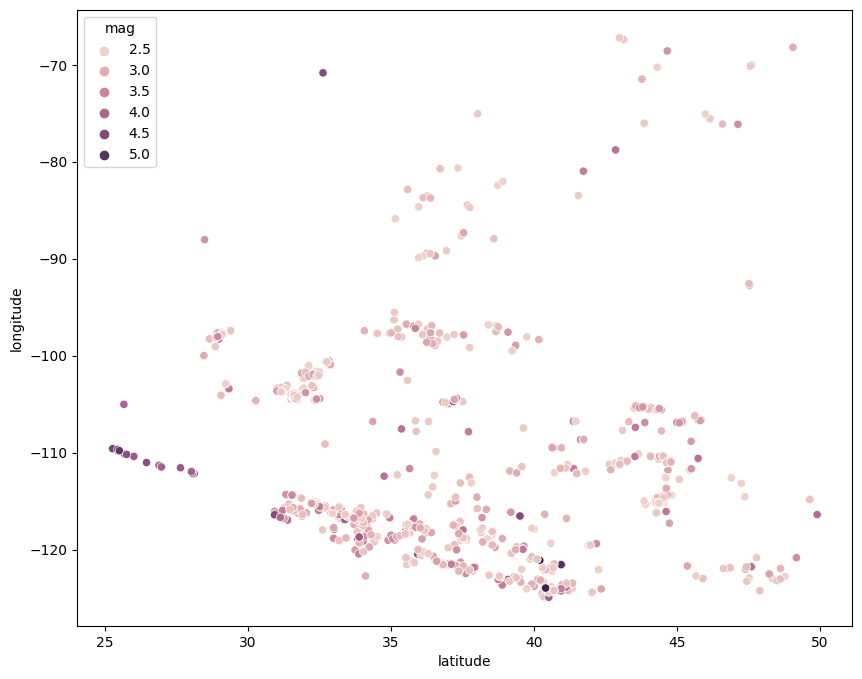

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dataset,
               x='latitude',
               y='longitude',
               hue='mag')
plt.show()

<Axes: xlabel='locationSource', ylabel='count'>

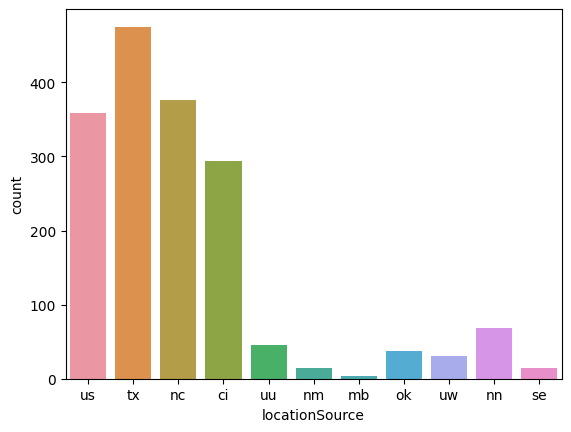

In [ ]:
sns.countplot(x=dataset["locationSource"])

<Axes: xlabel='locationSource', ylabel='mag'>

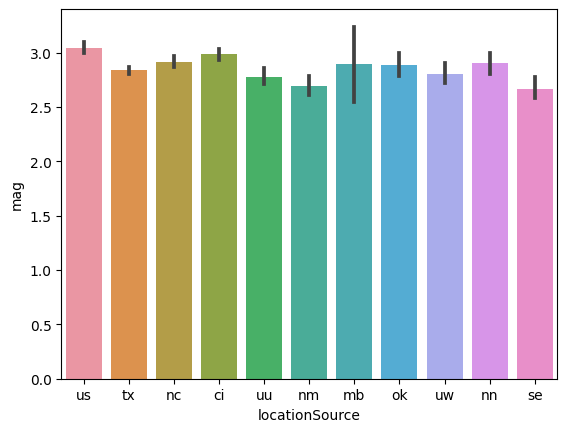

In [ ]:
sns.barplot(x = 'locationSource',
            y = 'mag',
            data = dataset)

In [ ]:
# California dataset.
# Make points in an area where higher probable for earthquake
# and which area are vulnerable relatively.(Follow from raw dataset colab)
# Different models, multiclass like degree of damage.
# Accuracies, f1 score, recall, etc.
# If additional dataset like environment dataset can be merged.

#New Work - Map output

In [ ]:
!pip3 install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 29.6 MB/s eta 0:00:00


In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

In [ ]:
longitudes = dataset["longitude"].tolist()
latitudes = dataset["latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

In [ ]:
latitudes

[32.689,
 31.65513307,
 39.3033333,
 39.8786659,
 39.8709984,
 33.7723333,
 37.1958,
 31.6368,
 37.1833,
 31.6492,
 33.2341667,
 44.7615,
 29.04693604,
 37.0424,
 38.5985,
 31.73471451,
 32.0403333,
 34.0328333,
 40.9661667,
 40.959,
 40.9618333,
 40.953,
 33.233,
 31.94000244,
 40.0074997,
 38.5055008,
 44.6623,
 37.513,
 31.73209265,
 40.2316667,
 31.74703215,
 33.7431667,
 33.931,
 40.124,
 31.66799545,
 31.65367085,
 35.1181679,
 31.67983578,
 37.0452,
 43.0971,
 43.9044,
 31.36084501,
 31.35762592,
 43.8795,
 31.60373983,
 40.2049,
 32.0038481,
 35.9913333,
 42.6356667,
 31.67356557,
 31.60789016,
 31.58604836,
 38.8053333,
 40.6023333,
 36.26766667,
 28.95172119,
 38.6879,
 31.93267822,
 32.3861667,
 33.1606667,
 37.4161667,
 32.00672923,
 31.63014265,
 32.9665,
 31.6278333,
 32.10388184,
 31.60349918,
 31.91711426,
 39.7499,
 37.4328333,
 41.3888333,
 31.01496887,
 37.0512,
 29.07073975,
 32.00167485,
 33.0018333,
 37.469,
 30.9296,
 41.73,
 37.0186,
 46.767833333333336,
 31.611

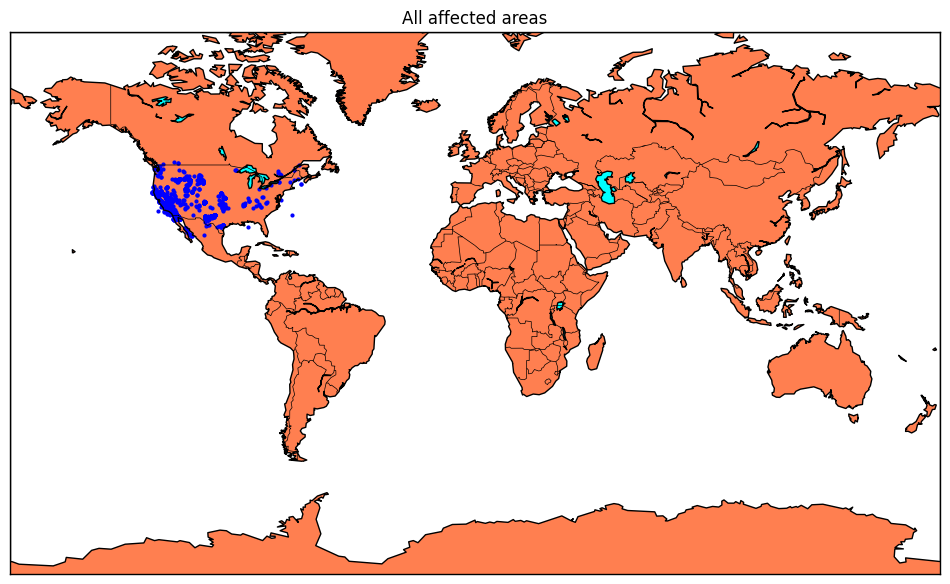

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()
# For reference: https://www.kaggle.com/code/mahadevmm9/earthquake-prediction

#Extraction

In [ ]:
dataset

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magError,magNst,status,locationSource,magSource,Date,Year,Month,Day,Hour
0,2023-09-11T11:59:15.755Z,32.69,-109.13,5.00,2.80,ml,23,70.00,0.14,0.64,...,0.06,40.00,reviewed,us,us,2023-09-11,2023,9,11,11
1,2023-09-11T11:32:28.490Z,31.66,-104.38,4.13,2.90,ml,19,60.00,0.05,0.20,...,0.10,13.00,reviewed,tx,tx,2023-09-11,2023,9,11,11
2,2023-09-11T09:35:33.400Z,39.30,-122.80,1.99,2.77,md,38,86.00,0.18,0.14,...,0.14,36.00,automatic,nc,nc,2023-09-11,2023,9,11,9
3,2023-09-11T09:30:57.250Z,39.88,-121.00,-1.17,2.51,md,20,55.00,0.37,0.30,...,0.13,10.00,automatic,nc,nc,2023-09-11,2023,9,11,9
4,2023-09-11T07:17:49.880Z,39.87,-121.00,-1.11,2.57,md,19,61.00,0.38,0.31,...,0.15,12.00,automatic,nc,nc,2023-09-11,2023,9,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,2023-01-01T09:07:25.940Z,35.82,-121.35,3.74,2.60,md,42,176.00,0.10,0.13,...,0.14,44.00,reviewed,nc,nc,2023-01-01,2023,1,1,9
1715,2023-01-01T06:49:10.190Z,36.59,-121.21,7.74,3.90,mw,70,72.00,0.03,0.13,...,NaN,5.00,reviewed,nc,nc,2023-01-01,2023,1,1,6
1716,2023-01-01T06:19:31.410Z,36.60,-121.20,8.14,3.14,ml,67,66.00,0.03,0.10,...,0.15,58.00,reviewed,nc,nc,2023-01-01,2023,1,1,6
1717,2023-01-01T05:18:17.780Z,40.70,-124.21,18.47,2.70,md,30,154.00,0.01,0.14,...,0.11,35.00,reviewed,nc,nc,2023-01-01,2023,1,1,5


In [ ]:
dataset['addr']=dataset['place'].str.split(',').str[0]
dataset['cityName']=dataset['place'].str.split(',').str[1]
# dataset['location3']=dataset['Route'].str.split('→').str[2]
# dataset['location4']=dataset['Route'].str.split('→').str[3]
# dataset['location5']=dataset['Route'].str.split('→').str[4]

dataset

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,status,locationSource,magSource,Date,Year,Month,Day,Hour,addr,cityName
0,2023-09-11T11:59:15.755Z,32.69,-109.13,5.00,2.80,ml,23,70.00,0.14,0.64,...,reviewed,us,us,2023-09-11,2023,9,11,11,4 km SSW of Duncan,Arizona
1,2023-09-11T11:32:28.490Z,31.66,-104.38,4.13,2.90,ml,19,60.00,0.05,0.20,...,reviewed,tx,tx,2023-09-11,2023,9,11,11,57 km S of Whites City,New Mexico
2,2023-09-11T09:35:33.400Z,39.30,-122.80,1.99,2.77,md,38,86.00,0.18,0.14,...,automatic,nc,nc,2023-09-11,2023,9,11,9,18 km SE of Lake Pillsbury,CA
3,2023-09-11T09:30:57.250Z,39.88,-121.00,-1.17,2.51,md,20,55.00,0.37,0.30,...,automatic,nc,nc,2023-09-11,2023,9,11,9,8 km SW of Quincy,CA
4,2023-09-11T07:17:49.880Z,39.87,-121.00,-1.11,2.57,md,19,61.00,0.38,0.31,...,automatic,nc,nc,2023-09-11,2023,9,11,7,9 km SSW of Quincy,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,2023-01-01T09:07:25.940Z,35.82,-121.35,3.74,2.60,md,42,176.00,0.10,0.13,...,reviewed,nc,nc,2023-01-01,2023,1,1,9,24km NW of San Simeon,CA
1715,2023-01-01T06:49:10.190Z,36.59,-121.21,7.74,3.90,mw,70,72.00,0.03,0.13,...,reviewed,nc,nc,2023-01-01,2023,1,1,6,9km NW of Pinnacles,CA
1716,2023-01-01T06:19:31.410Z,36.60,-121.20,8.14,3.14,ml,67,66.00,0.03,0.10,...,reviewed,nc,nc,2023-01-01,2023,1,1,6,9km NW of Pinnacles,CA
1717,2023-01-01T05:18:17.780Z,40.70,-124.21,18.47,2.70,md,30,154.00,0.01,0.14,...,reviewed,nc,nc,2023-01-01,2023,1,1,5,3km SSW of Humboldt Hill,CA


In [ ]:
dataset['cityName'].unique()

array([' Arizona', ' New Mexico', ' CA', ' Colorado', ' Texas',
       ' Montana', ' Illinois', ' B.C.', nan, ' Wyoming', ' Idaho',
       ' Nebraska', ' Oklahoma', ' Kansas', ' Mexico', ' Ohio',
       ' Washington', ' Missouri', ' Nevada', ' Quebec', ' Canada',
       ' Maine', ' Oregon', ' Kentucky', ' California', ' Utah',
       ' Virginia', ' Tennessee', ' Louisiana', ' North Carolina',
       ' New Hampshire', ' New York', ' Minnesota', ' Arkansas'],
      dtype=object)

In [ ]:
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

In [ ]:
def mapshow(dataset):
  fig = px.scatter_mapbox(dataset, lat='latitude', lon='longitude',
                          # radius=10,
                          center=dict(lat=35, lon=-85),
                          zoom=2,
                          title = "Quakes in CA by Latitude & Longitude",
                          color = 'mag',
                          color_continuous_scale= [
                            [0.0, "green"],

                            [0.5, "yellow"],

                            [1, "red"]])
  fig.update_layout(mapbox_style="stamen-terrain", title_font_size=16, title_x=0.5)
  fig.show()

In [ ]:
mapshow(dataset)

#Preprocessing

In [ ]:
ds = dataset
ds

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,status,locationSource,magSource,Date,Year,Month,Day,Hour,addr,cityName
0,2023-09-11T11:59:15.755Z,32.69,-109.13,5.00,2.80,ml,23,70.00,0.14,0.64,...,reviewed,us,us,2023-09-11,2023,9,11,11,4 km SSW of Duncan,Arizona
1,2023-09-11T11:32:28.490Z,31.66,-104.38,4.13,2.90,ml,19,60.00,0.05,0.20,...,reviewed,tx,tx,2023-09-11,2023,9,11,11,57 km S of Whites City,New Mexico
2,2023-09-11T09:35:33.400Z,39.30,-122.80,1.99,2.77,md,38,86.00,0.18,0.14,...,automatic,nc,nc,2023-09-11,2023,9,11,9,18 km SE of Lake Pillsbury,CA
3,2023-09-11T09:30:57.250Z,39.88,-121.00,-1.17,2.51,md,20,55.00,0.37,0.30,...,automatic,nc,nc,2023-09-11,2023,9,11,9,8 km SW of Quincy,CA
4,2023-09-11T07:17:49.880Z,39.87,-121.00,-1.11,2.57,md,19,61.00,0.38,0.31,...,automatic,nc,nc,2023-09-11,2023,9,11,7,9 km SSW of Quincy,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,2023-01-01T09:07:25.940Z,35.82,-121.35,3.74,2.60,md,42,176.00,0.10,0.13,...,reviewed,nc,nc,2023-01-01,2023,1,1,9,24km NW of San Simeon,CA
1715,2023-01-01T06:49:10.190Z,36.59,-121.21,7.74,3.90,mw,70,72.00,0.03,0.13,...,reviewed,nc,nc,2023-01-01,2023,1,1,6,9km NW of Pinnacles,CA
1716,2023-01-01T06:19:31.410Z,36.60,-121.20,8.14,3.14,ml,67,66.00,0.03,0.10,...,reviewed,nc,nc,2023-01-01,2023,1,1,6,9km NW of Pinnacles,CA
1717,2023-01-01T05:18:17.780Z,40.70,-124.21,18.47,2.70,md,30,154.00,0.01,0.14,...,reviewed,nc,nc,2023-01-01,2023,1,1,5,3km SSW of Humboldt Hill,CA


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1719 non-null   object 
 1   latitude         1719 non-null   float64
 2   longitude        1719 non-null   float64
 3   depth            1719 non-null   float64
 4   mag              1719 non-null   float64
 5   magType          1719 non-null   object 
 6   nst              1719 non-null   int64  
 7   gap              1719 non-null   float64
 8   dmin             1705 non-null   float64
 9   rms              1719 non-null   float64
 10  net              1719 non-null   object 
 11  id               1719 non-null   object 
 12  updated          1719 non-null   object 
 13  place            1673 non-null   object 
 14  type             1719 non-null   object 
 15  horizontalError  1612 non-null   float64
 16  depthError       1719 non-null   float64
 17  magError      

In [ ]:
# ds['id']
# ds['net'].unique()
# ds['updated']
# ds['type'].unique()
# ds['status'].unique()
# ds['magSource'].unique()

In [ ]:
# Delete unnecessary columns
del ds["time"]
del ds["Date"]
del ds["place"]
del ds["addr"]
del dataset["id"]
del dataset["updated"]
del ds["Year"]

In [ ]:
ds

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,depthError,magError,magNst,status,locationSource,magSource,Month,Day,Hour,cityName
0,32.69,-109.13,5.00,2.80,ml,23,70.00,0.14,0.64,us,...,1.97,0.06,40.00,reviewed,us,us,9,11,11,Arizona
1,31.66,-104.38,4.13,2.90,ml,19,60.00,0.05,0.20,tx,...,1.40,0.10,13.00,reviewed,tx,tx,9,11,11,New Mexico
2,39.30,-122.80,1.99,2.77,md,38,86.00,0.18,0.14,nc,...,2.09,0.14,36.00,automatic,nc,nc,9,11,9,CA
3,39.88,-121.00,-1.17,2.51,md,20,55.00,0.37,0.30,nc,...,3.60,0.13,10.00,automatic,nc,nc,9,11,9,CA
4,39.87,-121.00,-1.11,2.57,md,19,61.00,0.38,0.31,nc,...,5.22,0.15,12.00,automatic,nc,nc,9,11,7,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,35.82,-121.35,3.74,2.60,md,42,176.00,0.10,0.13,nc,...,0.77,0.14,44.00,reviewed,nc,nc,1,1,9,CA
1715,36.59,-121.21,7.74,3.90,mw,70,72.00,0.03,0.13,nc,...,0.33,NaN,5.00,reviewed,nc,nc,1,1,6,CA
1716,36.60,-121.20,8.14,3.14,ml,67,66.00,0.03,0.10,nc,...,0.30,0.15,58.00,reviewed,nc,nc,1,1,6,CA
1717,40.70,-124.21,18.47,2.70,md,30,154.00,0.01,0.14,nc,...,0.28,0.11,35.00,reviewed,nc,nc,1,1,5,CA


In [ ]:
ds.isnull().sum()

latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                14
rms                  0
net                  0
type                 0
horizontalError    107
depthError           0
magError            72
magNst               3
status               0
locationSource       0
magSource            0
Month                0
Day                  0
Hour                 0
cityName           160
dtype: int64

In [ ]:
ds = ds.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
type_le = LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
status_le = LabelEncoder()
locationSource_le = LabelEncoder()
magSource_le = LabelEncoder()
cityName_le = LabelEncoder()
ds["type"]=type_le.fit_transform(ds["type"])
ds["magType"]=magtype_le.fit_transform(ds["magType"])
ds["net"]=net_le.fit_transform(ds["net"])
ds["status"]=status_le.fit_transform(ds["status"])
ds["locationSource"]=locationSource_le.fit_transform(ds["locationSource"])
ds["magSource"]=magSource_le.fit_transform(ds["magSource"])
ds["cityName"]=cityName_le.fit_transform(ds["cityName"])
ds

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,depthError,magError,magNst,status,locationSource,magSource,Month,Day,Hour,cityName
0,32.69,-109.13,5.00,2.80,3,23,70.00,0.14,0.64,6,...,1.97,0.06,40.00,1,6,6,9,11,11,0
1,31.66,-104.38,4.13,2.90,3,19,60.00,0.05,0.20,5,...,1.40,0.10,13.00,1,5,5,9,11,11,19
2,39.30,-122.80,1.99,2.77,2,38,86.00,0.18,0.14,2,...,2.09,0.14,36.00,0,2,2,9,11,9,3
3,39.88,-121.00,-1.17,2.51,2,20,55.00,0.37,0.30,2,...,3.60,0.13,10.00,0,2,2,9,11,9,3
4,39.87,-121.00,-1.11,2.57,2,19,61.00,0.38,0.31,2,...,5.22,0.15,12.00,0,2,2,9,11,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,32.60,-117.97,5.95,2.65,3,27,247.00,0.63,0.32,0,...,31.61,0.15,91.00,1,0,0,1,1,16,3
1714,35.82,-121.35,3.74,2.60,2,42,176.00,0.10,0.13,2,...,0.77,0.14,44.00,1,2,2,1,1,9,3
1716,36.60,-121.20,8.14,3.14,3,67,66.00,0.03,0.10,2,...,0.30,0.15,58.00,1,2,2,1,1,6,3
1717,40.70,-124.21,18.47,2.70,2,30,154.00,0.01,0.14,2,...,0.28,0.11,35.00,1,2,2,1,1,5,3


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1718
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1386 non-null   float64
 1   longitude        1386 non-null   float64
 2   depth            1386 non-null   float64
 3   mag              1386 non-null   float64
 4   magType          1386 non-null   int64  
 5   nst              1386 non-null   int64  
 6   gap              1386 non-null   float64
 7   dmin             1386 non-null   float64
 8   rms              1386 non-null   float64
 9   net              1386 non-null   int64  
 10  type             1386 non-null   int64  
 11  horizontalError  1386 non-null   float64
 12  depthError       1386 non-null   float64
 13  magError         1386 non-null   float64
 14  magNst           1386 non-null   float64
 15  status           1386 non-null   int64  
 16  locationSource   1386 non-null   int64  
 17  magSource     

In [ ]:
ds.corr()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,depthError,magError,magNst,status,locationSource,magSource,Month,Day,Hour,cityName
latitude,1.00,-0.23,0.03,-0.04,-0.10,-0.04,0.12,0.43,0.29,0.19,...,0.03,-0.10,0.12,-0.03,0.19,0.20,-0.15,-0.05,0.14,-0.07
longitude,-0.23,1.00,-0.18,0.03,0.08,-0.42,-0.08,0.21,0.25,0.60,...,0.08,-0.35,-0.36,0.08,0.60,0.60,-0.02,0.01,0.01,0.65
depth,0.03,-0.18,1.00,-0.08,-0.07,0.09,0.15,-0.14,-0.14,-0.09,...,-0.02,0.17,-0.01,0.07,-0.09,-0.09,0.02,-0.05,-0.08,-0.19
mag,-0.04,0.03,-0.08,1.00,0.14,0.12,0.02,0.22,0.29,0.07,...,0.07,-0.13,0.28,-0.00,0.07,0.07,0.02,-0.01,0.06,0.05
magType,-0.10,0.08,-0.07,0.14,1.00,-0.05,-0.15,-0.09,0.09,0.08,...,0.04,-0.14,-0.09,0.03,0.08,0.08,-0.02,0.06,0.02,0.25
nst,-0.04,-0.42,0.09,0.12,-0.05,1.00,-0.33,-0.21,-0.13,-0.44,...,-0.21,0.16,0.56,0.01,-0.44,-0.44,0.06,-0.04,-0.03,-0.41
gap,0.12,-0.08,0.15,0.02,-0.15,-0.33,1.00,0.25,0.07,0.03,...,0.27,0.04,-0.16,-0.02,0.03,0.03,-0.04,0.02,0.01,-0.06
dmin,0.43,0.21,-0.14,0.22,-0.09,-0.21,0.25,1.00,0.67,0.33,...,0.27,-0.39,0.08,0.01,0.33,0.33,-0.10,-0.08,0.14,0.20
rms,0.29,0.25,-0.14,0.29,0.09,-0.13,0.07,0.67,1.00,0.41,...,0.19,-0.44,0.07,-0.01,0.41,0.41,-0.00,-0.04,0.12,0.21
net,0.19,0.60,-0.09,0.07,0.08,-0.44,0.03,0.33,0.41,1.00,...,0.00,-0.41,-0.37,0.07,1.00,1.00,-0.11,-0.04,0.07,0.76


#Train, Test left

In [ ]:
x=ds.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y=ds.iloc[:,[3]]

In [ ]:
x.isnull().sum()

latitude           0
longitude          0
depth              0
magType            0
gap                0
dmin               0
rms                0
net                0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
Month              0
Day                0
Hour               0
cityName           0
dtype: int64

In [ ]:
# x[x['horizontalError']==np.NaN]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred3=dt.predict(x_test)
y_pred3

array([3.24, 2.67, 3.1 , 2.5 , 2.77, 2.54, 2.67, 3.  , 2.6 , 2.8 , 2.5 ,
       3.3 , 3.3 , 3.52, 2.52, 4.1 , 2.5 , 2.8 , 2.5 , 2.69, 2.79, 2.6 ,
       2.57, 2.86, 2.55, 3.19, 3.5 , 4.2 , 2.7 , 3.1 , 2.5 , 2.75, 2.69,
       2.5 , 2.5 , 3.12, 2.7 , 2.5 , 2.64, 2.5 , 3.06, 2.5 , 2.85, 2.7 ,
       2.55, 2.76, 2.6 , 2.8 , 3.4 , 2.8 , 2.5 , 3.34, 3.07, 4.1 , 2.99,
       4.  , 3.8 , 2.77, 2.61, 3.3 , 2.5 , 2.77, 2.8 , 2.6 , 4.2 , 3.06,
       2.5 , 2.5 , 2.5 , 3.  , 2.5 , 3.58, 3.  , 3.3 , 3.6 , 3.3 , 3.12,
       4.  , 3.58, 3.2 , 3.1 , 2.8 , 2.7 , 3.19, 2.66, 4.1 , 2.5 , 3.2 ,
       2.64, 3.8 , 2.8 , 3.1 , 2.5 , 2.5 , 2.8 , 2.8 , 2.84, 2.5 , 2.52,
       2.91, 3.81, 2.8 , 2.94, 2.8 , 2.57, 4.1 , 2.59, 3.52, 2.9 , 3.4 ,
       2.8 , 2.5 , 2.7 , 2.7 , 3.  , 2.79, 3.24, 2.5 , 3.16, 2.65, 3.  ,
       2.91, 2.5 , 2.7 , 2.6 , 2.73, 2.59, 3.27, 3.38, 3.6 , 3.1 , 3.  ,
       3.09, 2.7 , 2.6 , 2.6 , 2.7 , 2.78, 3.2 , 2.69, 2.8 , 2.8 , 3.37,
       2.77, 2.8 , 2.53, 3.9 , 2.66, 2.77, 2.7 , 2.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ac3 = r2_score(y_test, y_pred3)
ac3

-0.09238389814051273

In [ ]:
ac2 = mean_squared_error(y_test, y_pred3)
ac2

0.17360076095036311

In [ ]:
ac1 = mean_absolute_error(y_test, y_pred3)
ac1

0.2953555679798271

In [ ]:
x_test['mag'] = y_pred3

In [ ]:
x_test

,latitude,longitude,depth,magType,gap,dmin,rms,net,type,horizontalError,...,magError,magNst,status,locationSource,magSource,Month,Day,Hour,cityName,mag
1215,33.19,-115.57,4.45,3,46.00,0.04,0.22,0,0,0.19,...,0.16,49.00,1,0,0,3,15,1,3,3.24
1437,44.80,-110.97,11.02,3,40.00,0.05,0.16,7,0,0.33,...,0.16,4.00,1,7,7,2,10,14,15,2.67
697,40.61,-109.45,0.00,3,149.00,0.10,0.38,6,1,2.52,...,0.04,98.00,1,6,6,5,22,15,27,3.10
980,31.69,-104.47,7.26,3,64.00,0.04,0.30,5,0,1.07,...,0.10,24.00,1,5,5,4,17,13,19,2.50
365,31.60,-114.41,5.95,3,123.00,0.57,0.25,0,0,0.61,...,0.21,29.00,1,0,0,7,17,7,2,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,37.29,-117.59,6.02,3,54.00,0.07,0.23,6,0,1.29,...,0.04,96.00,1,6,6,5,21,11,17,2.68
959,37.19,-104.74,6.82,1,74.00,0.08,0.72,6,0,1.81,...,0.07,71.00,1,6,6,4,18,23,5,2.78
197,37.87,-122.05,9.80,3,43.00,0.04,0.11,2,0,0.11,...,0.22,136.00,1,2,2,8,15,14,3,3.40
520,29.14,-97.70,8.78,3,77.00,0.06,0.20,5,0,1.46,...,0.20,10.00,1,5,5,6,20,21,26,2.60


In [ ]:
mapshow(x_test)

##Feature Selection
with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods

In [ ]:
ds

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,depthError,magError,magNst,status,locationSource,Month,Day,Hour
0,32.69,-109.13,5.00,2.80,3,23,70.00,0.14,0.64,0,1.97,0.06,40.00,1,6,9,11,11
1,31.66,-104.38,4.13,2.90,3,19,60.00,0.05,0.20,0,1.40,0.10,13.00,1,5,9,11,11
2,39.30,-122.80,1.99,2.77,2,38,86.00,0.18,0.14,0,2.09,0.14,36.00,0,2,9,11,9
3,39.88,-121.00,-1.17,2.51,2,20,55.00,0.37,0.30,0,3.60,0.13,10.00,0,2,9,11,9
4,39.87,-121.00,-1.11,2.57,2,19,61.00,0.38,0.31,0,5.22,0.15,12.00,0,2,9,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,32.60,-117.97,5.95,2.65,3,27,247.00,0.63,0.32,0,31.61,0.15,91.00,1,0,1,1,16
1714,35.82,-121.35,3.74,2.60,2,42,176.00,0.10,0.13,0,0.77,0.14,44.00,1,2,1,1,9
1716,36.60,-121.20,8.14,3.14,3,67,66.00,0.03,0.10,0,0.30,0.15,58.00,1,2,1,1,6
1717,40.70,-124.21,18.47,2.70,2,30,154.00,0.01,0.14,0,0.28,0.11,35.00,1,2,1,1,5


In [ ]:
ds.corr()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,depthError,magError,magNst,status,locationSource,Month,Day,Hour
latitude,1.00,-0.23,0.03,-0.04,-0.10,-0.04,0.12,0.43,0.29,0.44,0.03,-0.10,0.12,-0.03,0.19,-0.15,-0.05,0.14
longitude,-0.23,1.00,-0.18,0.03,0.08,-0.42,-0.08,0.21,0.25,0.16,0.08,-0.35,-0.36,0.08,0.60,-0.02,0.01,0.01
depth,0.03,-0.18,1.00,-0.08,-0.07,0.09,0.15,-0.14,-0.14,-0.34,-0.02,0.17,-0.01,0.07,-0.09,0.02,-0.05,-0.08
mag,-0.04,0.03,-0.08,1.00,0.14,0.12,0.02,0.22,0.29,0.18,0.07,-0.13,0.28,-0.00,0.07,0.02,-0.01,0.06
magType,-0.10,0.08,-0.07,0.14,1.00,-0.05,-0.15,-0.09,0.09,0.09,0.04,-0.14,-0.09,0.03,0.08,-0.02,0.06,0.02
nst,-0.04,-0.42,0.09,0.12,-0.05,1.00,-0.33,-0.21,-0.13,-0.15,-0.21,0.16,0.56,0.01,-0.44,0.06,-0.04,-0.03
gap,0.12,-0.08,0.15,0.02,-0.15,-0.33,1.00,0.25,0.07,0.07,0.27,0.04,-0.16,-0.02,0.03,-0.04,0.02,0.01
dmin,0.43,0.21,-0.14,0.22,-0.09,-0.21,0.25,1.00,0.67,0.64,0.27,-0.39,0.08,0.01,0.33,-0.10,-0.08,0.14
rms,0.29,0.25,-0.14,0.29,0.09,-0.13,0.07,0.67,1.00,0.50,0.19,-0.44,0.07,-0.01,0.41,-0.00,-0.04,0.12
type,0.44,0.16,-0.34,0.18,0.09,-0.15,0.07,0.64,0.50,1.00,0.03,-0.31,0.05,0.02,0.26,-0.15,-0.03,0.29


In [ ]:
x_fs = ds.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y_fs = ds.iloc[:,3]

In [ ]:
col = ds.columns
print(col)

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'net', 'type', 'horizontalError', 'depthError',
       'magError', 'magNst', 'status', 'locationSource', 'magSource', 'Month',
       'Day', 'Hour', 'cityName'],
      dtype='object')


<Axes: >

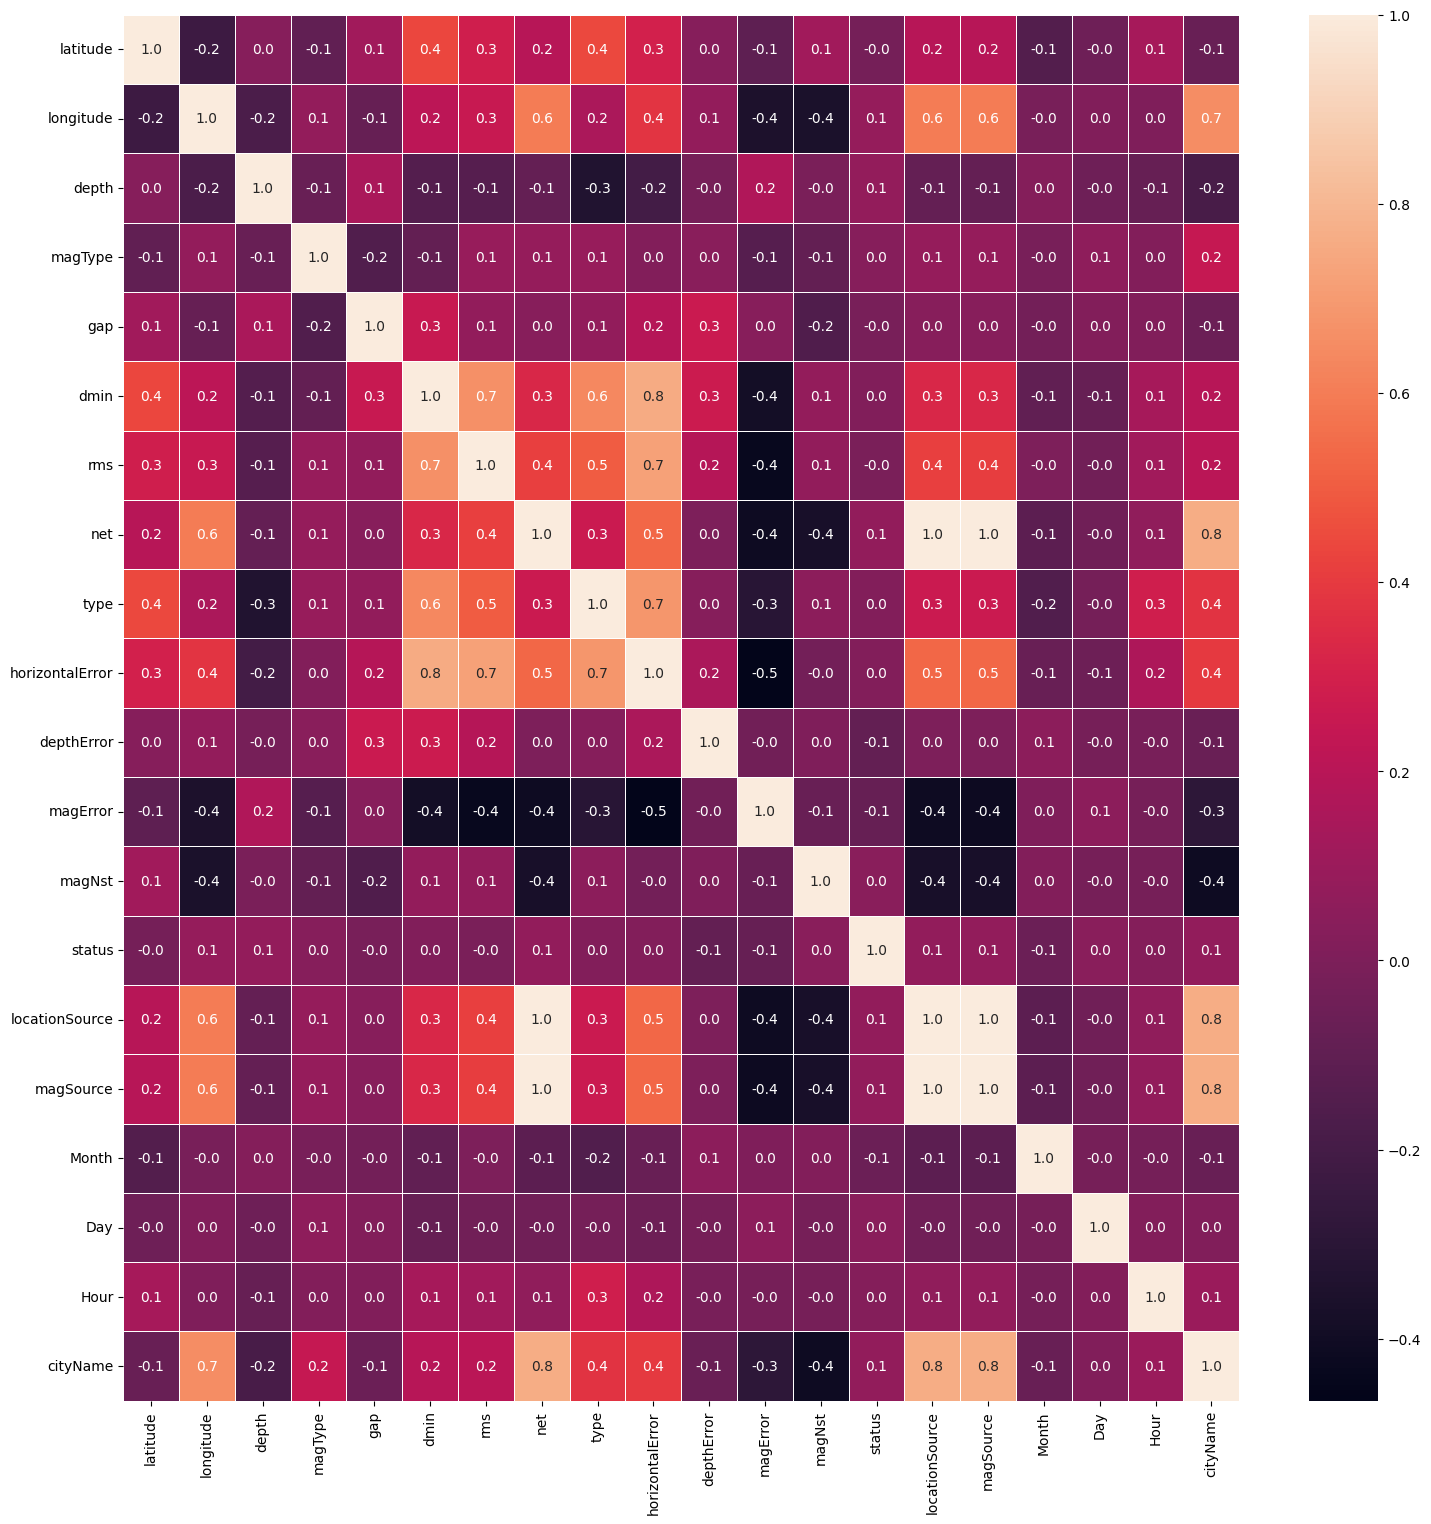

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_fs.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

net, locationSource, magSource, cityName are correlated (1.0), so only one of them required.
dmin and horizontalError same.

In [ ]:
del ds["net"]
del ds["magSource"]
del ds["cityName"]

del ds["horizontalError"]

In [ ]:
ds

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,depthError,magError,magNst,status,locationSource,Month,Day,Hour
0,32.69,-109.13,5.00,2.80,3,23,70.00,0.14,0.64,0,1.97,0.06,40.00,1,6,9,11,11
1,31.66,-104.38,4.13,2.90,3,19,60.00,0.05,0.20,0,1.40,0.10,13.00,1,5,9,11,11
2,39.30,-122.80,1.99,2.77,2,38,86.00,0.18,0.14,0,2.09,0.14,36.00,0,2,9,11,9
3,39.88,-121.00,-1.17,2.51,2,20,55.00,0.37,0.30,0,3.60,0.13,10.00,0,2,9,11,9
4,39.87,-121.00,-1.11,2.57,2,19,61.00,0.38,0.31,0,5.22,0.15,12.00,0,2,9,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,32.60,-117.97,5.95,2.65,3,27,247.00,0.63,0.32,0,31.61,0.15,91.00,1,0,1,1,16
1714,35.82,-121.35,3.74,2.60,2,42,176.00,0.10,0.13,0,0.77,0.14,44.00,1,2,1,1,9
1716,36.60,-121.20,8.14,3.14,3,67,66.00,0.03,0.10,0,0.30,0.15,58.00,1,2,1,1,6
1717,40.70,-124.21,18.47,2.70,2,30,154.00,0.01,0.14,0,0.28,0.11,35.00,1,2,1,1,5


#Testing after feature selection

In [ ]:
xfinal=ds.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17]]
yfinal=ds.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
x_trainfinal,x_testfinal,y_trainfinal,y_testfinal=train_test_split(xfinal,yfinal,random_state=11,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelfinal = DecisionTreeRegressor()
modelfinal.fit(x_trainfinal, y_trainfinal)

DecisionTreeRegressor()

In [ ]:
y_predfinal=modelfinal.predict(x_testfinal)
y_predfinal

array([2.61, 2.75, 3.07, 2.9 , 2.78, 2.7 , 2.67, 2.6 , 2.8 , 2.83, 3.1 ,
       3.3 , 2.7 , 3.52, 3.24, 3.6 , 2.8 , 3.  , 2.58, 2.64, 3.21, 2.5 ,
       2.59, 2.79, 2.7 , 3.4 , 2.5 , 4.2 , 2.71, 3.  , 3.5 , 3.2 , 2.68,
       2.58, 2.7 , 3.19, 3.  , 2.8 , 2.66, 2.6 , 3.07, 3.  , 2.85, 2.8 ,
       2.79, 2.58, 3.58, 2.8 , 2.9 , 3.3 , 2.7 , 3.09, 3.1 , 4.4 , 4.33,
       4.5 , 2.6 , 2.77, 2.61, 3.3 , 2.9 , 2.78, 2.5 , 2.6 , 4.3 , 3.06,
       2.6 , 2.6 , 2.9 , 3.1 , 3.1 , 2.7 , 3.  , 3.3 , 3.63, 3.3 , 3.16,
       4.  , 2.54, 3.2 , 3.5 , 3.  , 2.78, 3.  , 2.66, 3.6 , 2.5 , 3.2 ,
       2.66, 3.8 , 3.2 , 3.1 , 3.9 , 2.8 , 2.7 , 2.9 , 2.84, 2.6 , 2.52,
       3.04, 3.81, 3.94, 2.94, 3.8 , 2.5 , 2.61, 2.59, 3.52, 2.7 , 3.4 ,
       2.8 , 2.5 , 2.7 , 3.  , 3.8 , 2.79, 2.68, 2.6 , 3.24, 3.35, 2.6 ,
       2.91, 2.8 , 3.5 , 3.  , 2.79, 2.59, 2.81, 3.36, 3.4 , 3.06, 2.57,
       3.09, 2.62, 2.6 , 2.7 , 3.04, 2.96, 3.2 , 3.08, 2.9 , 3.1 , 3.56,
       2.9 , 2.9 , 2.53, 4.  , 2.66, 2.78, 2.7 , 2.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2final = r2_score(y_testfinal, y_predfinal)
r2final

0.09183037437880626

In [ ]:
msefinal = mean_squared_error(y_testfinal, y_predfinal)
msefinal

0.14432557853353312

In [ ]:
maefinal = mean_absolute_error(y_testfinal, y_predfinal)
maefinal

0.2742892855590778

#Plotting on map - Our final result

In [ ]:
x_testfinal['mag'] = y_predfinal

In [ ]:
x_testfinal

,latitude,longitude,depth,magType,gap,dmin,rms,type,depthError,magError,magNst,status,locationSource,Month,Day,Hour,mag
1215,33.19,-115.57,4.45,3,46.00,0.04,0.22,0,0.41,0.16,49.00,1,0,3,15,1,2.61
1437,44.80,-110.97,11.02,3,40.00,0.05,0.16,0,0.44,0.16,4.00,1,7,2,10,14,2.75
697,40.61,-109.45,0.00,3,149.00,0.10,0.38,1,0.82,0.04,98.00,1,6,5,22,15,3.07
980,31.69,-104.47,7.26,3,64.00,0.04,0.30,0,0.90,0.10,24.00,1,5,4,17,13,3.80
365,31.60,-114.41,5.95,3,123.00,0.57,0.25,0,31.61,0.21,29.00,1,0,7,17,7,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,37.29,-117.59,6.02,3,54.00,0.07,0.23,0,4.00,0.04,96.00,1,6,5,21,11,2.63
959,37.19,-104.74,6.82,1,74.00,0.08,0.72,0,5.97,0.07,71.00,1,6,4,18,23,2.77
197,37.87,-122.05,9.80,3,43.00,0.04,0.11,0,0.19,0.22,136.00,1,2,8,15,14,3.34
520,29.14,-97.70,8.78,3,77.00,0.06,0.20,0,2.41,0.20,10.00,1,5,6,20,21,3.40


In [ ]:
np.array(x_testfinal)[0]

array([ 3.31871667e+01, -1.15569667e+02,  4.45000000e+00,  3.00000000e+00,
        4.60000000e+01,  3.97500000e-02,  2.20000000e-01,  0.00000000e+00,
        4.10000000e-01,  1.63000000e-01,  4.90000000e+01,  1.00000000e+00,
        0.00000000e+00,  3.00000000e+00,  1.50000000e+01,  1.00000000e+00,
        2.61000000e+00])

In [ ]:
mapshow(x_testfinal)

In [ ]:
fig = px.scatter_mapbox(x_testfinal, lat='latitude', lon='longitude', color='mag',
             color_continuous_scale= [
                [0.0, "green"],

                            [0.5, "yellow"],

                            [1, "red"]],
                        zoom=3,
                        # opacity = 0.5
                        )


fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin=dict(b=0, t=0, l=0, r=0))


fig.show()

#More Models Testing

model1

In [ ]:
x1=ds.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17]]
y1=ds.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state=11,test_size=0.25)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
model1 = SVR()
model1.fit(x_train1, y_train1)

SVR()

In [ ]:
y_pred1=model1.predict(x_test1)
y_pred1

array([2.70264936, 2.72360165, 3.17925815, 2.73317613, 2.76409198,
       2.66764689, 2.71429112, 2.66149176, 2.75147584, 2.93504173,
       2.71895584, 2.70722665, 2.68965025, 3.19197829, 2.67028574,
       2.66881306, 2.79049892, 2.97525329, 2.71835542, 2.7964779 ,
       2.71560076, 2.78656589, 2.78413845, 2.66793137, 3.26367227,
       2.76715697, 2.71131783, 3.11726632, 2.7158019 , 2.86902914,
       2.70994467, 2.68421162, 2.69266616, 2.79271828, 2.69360759,
       2.95554248, 2.85453358, 2.68423417, 2.83687197, 2.78939041,
       2.78644306, 2.72113856, 2.86276791, 2.75520933, 2.70581058,
       2.71501829, 2.84796688, 2.81195422, 2.74777945, 2.73988473,
       2.69626311, 2.88092971, 2.98535866, 2.71317406, 2.74156658,
       2.79905767, 2.71579434, 3.14422225, 2.79721312, 2.88250769,
       2.64663471, 2.91770542, 2.74522633, 2.88955627, 2.9257348 ,
       2.79954778, 2.7175418 , 2.66062904, 2.77244304, 2.99979901,
       2.73494526, 2.65673837, 3.02213879, 3.06115326, 2.74853

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r21 = r2_score(y_test1, y_pred1)
r21

0.03722717832155831

In [ ]:
mse1 = mean_squared_error(y_test1, y_pred1)
mse1

0.15300307405685218

In [ ]:
mae1 = mean_absolute_error(y_test1, y_pred1)
mae1

0.26209435639513834

model2

In [ ]:
x2=ds.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17]]
y2=ds.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,random_state=11,test_size=0.25)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [ ]:
y_pred2=model2.predict(x_test2)
y_pred2

array([[2.80849734],
       [2.58451516],
       [3.16387624],
       [2.88492887],
       [2.89013779],
       [2.93351999],
       [2.65074816],
       [2.74627841],
       [2.83528527],
       [3.13367902],
       [2.79848246],
       [2.85581843],
       [2.96832414],
       [3.37568131],
       [2.76663026],
       [2.93777542],
       [2.9838196 ],
       [2.98428145],
       [2.72156728],
       [2.79099701],
       [2.84951877],
       [2.90117298],
       [2.68700573],
       [2.65748134],
       [3.11777762],
       [2.98304109],
       [2.79541169],
       [3.69041662],
       [2.62555906],
       [3.2578994 ],
       [2.75506024],
       [2.65692005],
       [2.83856823],
       [2.81886758],
       [2.79706513],
       [2.97436467],
       [3.18969107],
       [2.75565789],
       [2.89813372],
       [2.76113422],
       [2.87159013],
       [2.87139943],
       [2.82139245],
       [2.82468568],
       [2.75231473],
       [2.64363195],
       [2.76800754],
       [2.840

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r22 = r2_score(y_test2, y_pred2)
r22

0.20691922955168585

In [ ]:
mse2 = mean_squared_error(y_test2, y_pred2)
mse2

0.12603575124028235

In [ ]:
mae2 = mean_absolute_error(y_test2, y_pred2)
mae2

0.26302269224418323

model3

In [ ]:
x3=ds.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17]]
y3=ds.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,random_state=11,test_size=0.25)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(x_train3, y_train3)

RandomForestRegressor()

In [ ]:
y_pred3=model3.predict(x_test3)
y_pred3

array([2.8682, 2.7426, 3.2004, 2.8041, 2.8539, 2.8986, 2.6885, 2.7937,
       2.883 , 2.916 , 2.8946, 3.1337, 3.0125, 3.2398, 2.896 , 4.0182,
       2.7376, 3.1347, 2.6966, 2.7413, 2.753 , 2.8152, 2.5884, 2.8384,
       3.0212, 2.8727, 2.7577, 4.0281, 2.7515, 2.9964, 2.7371, 2.9401,
       2.6964, 2.841 , 2.8119, 3.0956, 2.832 , 2.7703, 2.8913, 2.7621,
       3.0505, 2.9273, 2.6777, 2.814 , 2.7577, 2.716 , 2.8339, 2.8213,
       3.0353, 2.88  , 2.7392, 2.9171, 3.0876, 3.7539, 3.0233, 4.2336,
       3.057 , 3.3697, 2.7509, 3.0099, 2.8997, 2.6468, 2.6409, 2.842 ,
       3.8295, 3.1045, 2.6662, 2.6125, 2.8725, 3.2294, 3.0958, 2.851 ,
       3.166 , 3.311 , 3.5698, 3.1513, 3.1158, 4.1071, 2.6866, 2.9956,
       2.8832, 2.9098, 2.7012, 2.9581, 2.7772, 3.9284, 2.9737, 3.168 ,
       2.719 , 2.8827, 2.8484, 3.2146, 2.8061, 2.6687, 2.801 , 2.8698,
       2.6382, 2.9541, 2.5735, 2.9275, 3.3075, 3.1329, 2.9152, 2.7275,
       2.6011, 2.7146, 2.6413, 3.5024, 3.0199, 3.3011, 2.7826, 2.8645,
      

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r23 = r2_score(y_test3, y_pred3)
r23

0.4964325860923655

In [ ]:
mse3 = mean_squared_error(y_test3, y_pred3)
mse3

0.08002652400221215

In [ ]:
mae3 = mean_absolute_error(y_test3, y_pred3)
mae3

0.2143117639452449

model4

In [ ]:
x4=ds.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17]]
y4=ds.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,random_state=11,test_size=0.25)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor()
model4.fit(x_train4, y_train4)

GradientBoostingRegressor()

In [ ]:
y_pred4=model4.predict(x_test4)
y_pred4

array([2.75039611, 2.73090543, 3.14484078, 2.86387585, 2.81361314,
       2.82263374, 2.66635343, 2.75403561, 2.82536726, 3.20381736,
       2.77154063, 2.85208918, 2.93834512, 3.20333657, 2.92143881,
       3.91034357, 2.91064624, 2.98815204, 2.77932818, 2.71859257,
       2.76921899, 2.83517904, 2.68770213, 2.79104908, 3.0395503 ,
       2.83833954, 2.8117341 , 4.12580932, 2.7734876 , 2.94835792,
       2.6726864 , 2.72970807, 2.74587944, 2.88072806, 2.85471981,
       3.11852192, 2.90350921, 2.78273668, 2.90384027, 2.78172411,
       3.02175284, 2.81540974, 2.817015  , 2.8043152 , 2.75257868,
       2.69781412, 2.74157799, 2.72070195, 2.87246121, 2.79884692,
       2.81214063, 2.86412897, 2.88518245, 4.07811957, 2.96660435,
       4.18176835, 2.87355919, 3.22134223, 2.73493248, 2.96863241,
       2.95566236, 2.66718542, 2.67903757, 2.92669333, 3.73022408,
       3.13781623, 2.60333803, 2.6268617 , 2.86080678, 3.24126209,
       2.86289543, 2.76606483, 3.23177161, 3.20115681, 3.45591

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r24 = r2_score(y_test4, y_pred4)
r24

0.45622156778064304

In [ ]:
mse4 = mean_squared_error(y_test4, y_pred4)
mse4

0.08641682633950099

In [ ]:
mae4 = mean_absolute_error(y_test4, y_pred4)
mae4

0.22436782608756417

#Recursive feature elimination (RFE) with random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf = RandomForestRegressor()
rfe = RFE(estimator=clf_rf, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

In [ ]:
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['latitude', 'longitude', 'depth', 'magType', 'gap', 'dmin',
       'horizontalError', 'depthError', 'magError', 'magNst'],
      dtype='object')


In [ ]:
l = ['latitude', 'longitude', 'depth', 'magType', 'gap', 'dmin', 'rms',
       'depthError', 'magError', 'magNst']

In [ ]:
tmpds = ds[l]
tmpds

,latitude,longitude,depth,magType,gap,dmin,rms,depthError,magError,magNst
0,32.69,-109.13,5.00,3,70.00,0.14,0.64,1.97,0.06,40.00
1,31.66,-104.38,4.13,3,60.00,0.05,0.20,1.40,0.10,13.00
2,39.30,-122.80,1.99,2,86.00,0.18,0.14,2.09,0.14,36.00
3,39.88,-121.00,-1.17,2,55.00,0.37,0.30,3.60,0.13,10.00
4,39.87,-121.00,-1.11,2,61.00,0.38,0.31,5.22,0.15,12.00
...,...,...,...,...,...,...,...,...,...,...
1712,32.60,-117.97,5.95,3,247.00,0.63,0.32,31.61,0.15,91.00
1714,35.82,-121.35,3.74,2,176.00,0.10,0.13,0.77,0.14,44.00
1716,36.60,-121.20,8.14,3,66.00,0.03,0.10,0.30,0.15,58.00
1717,40.70,-124.21,18.47,2,154.00,0.01,0.14,0.28,0.11,35.00


In [ ]:
tmpds['mag'] = ds['mag']
tmpds

,latitude,longitude,depth,magType,gap,dmin,rms,depthError,magError,magNst,mag
0,32.69,-109.13,5.00,3,70.00,0.14,0.64,1.97,0.06,40.00,2.80
1,31.66,-104.38,4.13,3,60.00,0.05,0.20,1.40,0.10,13.00,2.90
2,39.30,-122.80,1.99,2,86.00,0.18,0.14,2.09,0.14,36.00,2.77
3,39.88,-121.00,-1.17,2,55.00,0.37,0.30,3.60,0.13,10.00,2.51
4,39.87,-121.00,-1.11,2,61.00,0.38,0.31,5.22,0.15,12.00,2.57
...,...,...,...,...,...,...,...,...,...,...,...
1712,32.60,-117.97,5.95,3,247.00,0.63,0.32,31.61,0.15,91.00,2.65
1714,35.82,-121.35,3.74,2,176.00,0.10,0.13,0.77,0.14,44.00,2.60
1716,36.60,-121.20,8.14,3,66.00,0.03,0.10,0.30,0.15,58.00,3.14
1717,40.70,-124.21,18.47,2,154.00,0.01,0.14,0.28,0.11,35.00,2.70


In [ ]:
x=tmpds.iloc[:,[0,1,2,4,6,7,8,9]]
y=tmpds.iloc[:,[-1]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred3=dt.predict(x_test)
y_pred3

array([2.59, 2.75, 3.1 , 2.5 , 2.78, 2.5 , 2.67, 3.4 , 2.5 , 3.8 , 3.1 ,
       3.7 , 3.3 , 2.96, 3.24, 4.2 , 2.5 , 3.3 , 2.5 , 2.87, 2.79, 2.5 ,
       2.56, 2.79, 2.7 , 3.07, 2.5 , 2.8 , 2.61, 3.1 , 2.6 , 2.8 , 2.5 ,
       2.63, 2.7 , 2.52, 3.  , 2.8 , 2.66, 2.5 , 2.61, 2.8 , 2.8 , 2.5 ,
       2.58, 2.63, 2.5 , 2.57, 2.91, 2.5 , 3.1 , 2.7 , 2.94, 3.  , 2.79,
       4.  , 2.79, 2.83, 3.2 , 2.7 , 2.7 , 2.59, 2.5 , 2.6 , 2.6 , 3.  ,
       2.63, 3.4 , 2.9 , 3.2 , 2.5 , 2.91, 3.1 , 3.3 , 2.5 , 3.2 , 2.52,
       4.  , 3.07, 2.63, 3.4 , 3.  , 2.57, 3.  , 2.59, 4.1 , 3.3 , 3.3 ,
       2.74, 2.5 , 3.  , 3.8 , 2.9 , 3.2 , 2.7 , 3.2 , 2.65, 2.6 , 2.52,
       3.19, 3.4 , 2.98, 2.94, 2.5 , 3.8 , 3.17, 2.6 , 3.16, 3.2 , 3.8 ,
       3.2 , 2.7 , 2.8 , 2.7 , 3.3 , 2.69, 2.83, 2.5 , 2.55, 2.75, 2.6 ,
       2.74, 2.61, 3.5 , 2.7 , 2.94, 2.98, 3.72, 3.09, 2.9 , 3.5 , 2.76,
       2.58, 2.79, 3.  , 2.6 , 2.54, 2.96, 3.2 , 3.04, 2.9 , 3.94, 3.59,
       2.9 , 2.5 , 2.74, 2.6 , 2.55, 2.78, 2.7 , 2.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ac3 = r2_score(y_test, y_pred3)
ac3

-0.21753170878611594

In [ ]:
ac2 = mean_squared_error(y_test, y_pred3)
ac2

0.19348914926909508

In [ ]:
ac1 = mean_absolute_error(y_test, y_pred3)
ac1

0.3123872682680115

#Conclusion:
Should use results from simple feature selection only

#Extra Contextual Information

In [ ]:
new_ds = pd.read_csv('/content/drive/MyDrive/california_weather_api.csv')
new_ds

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,California,2023-01-01,15.10,6.50,11.00,15.10,4.20,9.80,2.70,57.40,...,7.40,5,10,2023-01-01T07:23:49,2023-01-01T16:55:32,0.32,Rain,Clear conditions throughout the day with early...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576..."
1,California,2023-01-02,8.80,3.90,6.40,7.70,2.20,4.40,3.10,79.70,...,2.30,1,10,2023-01-02T07:23:57,2023-01-02T16:56:21,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576..."
2,California,2023-01-03,8.40,5.60,7.00,7.80,2.30,5.00,5.60,90.60,...,4.40,3,10,2023-01-03T07:24:02,2023-01-03T16:57:12,0.39,"Rain, Overcast",Cloudy skies throughout the day with morning r...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576..."
3,California,2023-01-04,16.70,6.80,11.60,16.70,3.80,10.80,7.90,79.60,...,3.00,2,10,2023-01-04T07:24:05,2023-01-04T16:58:04,0.43,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KSMF,TS389,72483023232,72483993225,72483323206..."
4,California,2023-01-05,13.80,9.40,11.70,13.80,7.10,11.40,9.40,86.20,...,1.80,1,10,2023-01-05T07:24:06,2023-01-05T16:58:57,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"KSMF,TS389,72483023232,72483993225,72483323206..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,California,2023-09-25,25.40,13.40,18.70,25.40,13.40,18.70,11.40,64.90,...,18.90,7,10,2023-09-25T06:56:16,2023-09-25T18:58:28,0.37,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
268,California,2023-09-26,27.30,15.70,21.10,26.80,15.70,21.00,11.90,57.80,...,17.70,7,10,2023-09-26T06:57:10,2023-09-26T18:56:53,0.41,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
269,California,2023-09-27,29.40,12.30,20.10,28.00,12.30,19.90,11.30,62.40,...,18.90,7,10,2023-09-27T06:58:04,2023-09-27T18:55:18,0.44,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
270,California,2023-09-28,29.40,12.00,20.30,28.00,12.00,20.00,10.10,58.10,...,19.00,7,10,2023-09-28T06:58:58,2023-09-28T18:53:43,0.48,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."


In [ ]:
new_ds.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00,...,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00,272.00
mean,24.01,10.80,16.87,23.53,10.08,16.44,8.58,62.33,1.35,19.49,...,20.74,210.13,1014.30,21.53,15.60,225.02,19.43,7.32,10.00,0.47
std,8.70,5.32,6.57,8.41,6.12,6.93,4.70,11.73,3.92,39.68,...,7.76,63.93,5.13,29.45,0.97,96.15,8.34,2.33,0.00,0.29
min,8.00,-0.70,5.70,5.70,-3.30,2.30,-6.90,34.50,0.00,0.00,...,7.30,5.90,998.40,0.00,9.50,14.70,1.20,1.00,10.00,0.00
25%,15.67,6.38,11.00,15.67,4.30,10.55,5.47,54.20,0.00,0.00,...,15.28,185.80,1010.80,1.20,15.90,150.97,13.00,6.00,10.00,0.23
50%,24.80,11.80,18.00,24.80,11.80,18.00,10.10,62.35,0.00,0.00,...,19.70,196.30,1013.25,6.90,16.00,257.90,22.35,8.00,10.00,0.46
75%,31.42,15.00,22.23,30.40,15.00,22.00,12.10,69.03,0.00,0.00,...,24.23,222.68,1016.60,31.78,16.00,310.32,26.73,9.00,10.00,0.72
max,41.30,23.40,30.60,41.50,23.40,30.50,17.10,90.60,25.71,100.00,...,48.20,352.90,1029.50,100.00,16.00,333.20,28.80,10.00,10.00,0.98


In [ ]:
new_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              272 non-null    object 
 1   datetime          272 non-null    object 
 2   tempmax           272 non-null    float64
 3   tempmin           272 non-null    float64
 4   temp              272 non-null    float64
 5   feelslikemax      272 non-null    float64
 6   feelslikemin      272 non-null    float64
 7   feelslike         272 non-null    float64
 8   dew               272 non-null    float64
 9   humidity          272 non-null    float64
 10  precip            272 non-null    float64
 11  precipprob        272 non-null    int64  
 12  precipcover       272 non-null    float64
 13  preciptype        54 non-null     object 
 14  snow              272 non-null    int64  
 15  snowdepth         272 non-null    int64  
 16  windgust          272 non-null    float64
 1

In [ ]:
# new_ds['Date'] = pd.to_datetime(new_ds['datetime']).dt.date
# new_ds['Year'] = pd.to_datetime(new_ds['datetime']).dt.year
new_ds['Month'] = pd.to_datetime(new_ds['datetime']).dt.month
new_ds['Day'] = pd.to_datetime(new_ds['datetime']).dt.day
# new_ds['Hour'] = pd.to_datetime(new_ds['datetime']).dt.hour

In [ ]:
new_ds

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Month,Day
0,California,2023-01-01,15.10,6.50,11.00,15.10,4.20,9.80,2.70,57.40,...,10,2023-01-01T07:23:49,2023-01-01T16:55:32,0.32,Rain,Clear conditions throughout the day with early...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576...",1,1
1,California,2023-01-02,8.80,3.90,6.40,7.70,2.20,4.40,3.10,79.70,...,10,2023-01-02T07:23:57,2023-01-02T16:56:21,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576...",1,2
2,California,2023-01-03,8.40,5.60,7.00,7.80,2.30,5.00,5.60,90.60,...,10,2023-01-03T07:24:02,2023-01-03T16:57:12,0.39,"Rain, Overcast",Cloudy skies throughout the day with morning r...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576...",1,3
3,California,2023-01-04,16.70,6.80,11.60,16.70,3.80,10.80,7.90,79.60,...,10,2023-01-04T07:24:05,2023-01-04T16:58:04,0.43,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KSMF,TS389,72483023232,72483993225,72483323206...",1,4
4,California,2023-01-05,13.80,9.40,11.70,13.80,7.10,11.40,9.40,86.20,...,10,2023-01-05T07:24:06,2023-01-05T16:58:57,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"KSMF,TS389,72483023232,72483993225,72483323206...",1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,California,2023-09-25,25.40,13.40,18.70,25.40,13.40,18.70,11.40,64.90,...,10,2023-09-25T06:56:16,2023-09-25T18:58:28,0.37,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206...",9,25
268,California,2023-09-26,27.30,15.70,21.10,26.80,15.70,21.00,11.90,57.80,...,10,2023-09-26T06:57:10,2023-09-26T18:56:53,0.41,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"E9060,KSMF,72483023232,72483993225,72483323206...",9,26
269,California,2023-09-27,29.40,12.30,20.10,28.00,12.30,19.90,11.30,62.40,...,10,2023-09-27T06:58:04,2023-09-27T18:55:18,0.44,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206...",9,27
270,California,2023-09-28,29.40,12.00,20.30,28.00,12.00,20.00,10.10,58.10,...,10,2023-09-28T06:58:58,2023-09-28T18:53:43,0.48,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206...",9,28


In [ ]:
merged_ds = pd.merge(ds, new_ds, left_on=['Month','Day'], right_on=['Month','Day']).drop('name', axis=1)

In [ ]:
merged_ds

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,32.69,-109.13,5.00,2.80,3,23,70.00,0.14,0.64,0,...,22.60,8,10,2023-09-11T06:43:53,2023-09-11T19:20:44,0.89,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
1,31.66,-104.38,4.13,2.90,3,19,60.00,0.05,0.20,0,...,22.60,8,10,2023-09-11T06:43:53,2023-09-11T19:20:44,0.89,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
2,39.30,-122.80,1.99,2.77,2,38,86.00,0.18,0.14,0,...,22.60,8,10,2023-09-11T06:43:53,2023-09-11T19:20:44,0.89,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
3,39.88,-121.00,-1.17,2.51,2,20,55.00,0.37,0.30,0,...,22.60,8,10,2023-09-11T06:43:53,2023-09-11T19:20:44,0.89,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
4,39.87,-121.00,-1.11,2.57,2,19,61.00,0.38,0.31,0,...,22.60,8,10,2023-09-11T06:43:53,2023-09-11T19:20:44,0.89,Clear,Clear conditions throughout the day.,clear-day,"E9060,KSMF,72483023232,72483993225,72483323206..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,32.60,-117.97,5.95,2.65,3,27,247.00,0.63,0.32,0,...,7.40,5,10,2023-01-01T07:23:49,2023-01-01T16:55:32,0.32,Rain,Clear conditions throughout the day with early...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576..."
1382,35.82,-121.35,3.74,2.60,2,42,176.00,0.10,0.13,0,...,7.40,5,10,2023-01-01T07:23:49,2023-01-01T16:55:32,0.32,Rain,Clear conditions throughout the day with early...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576..."
1383,36.60,-121.20,8.14,3.14,3,67,66.00,0.03,0.10,0,...,7.40,5,10,2023-01-01T07:23:49,2023-01-01T16:55:32,0.32,Rain,Clear conditions throughout the day with early...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576..."
1384,40.70,-124.21,18.47,2.70,2,30,154.00,0.01,0.14,0,...,7.40,5,10,2023-01-01T07:23:49,2023-01-01T16:55:32,0.32,Rain,Clear conditions throughout the day with early...,rain,"KSMF,TS389,72483023232,72483993225,KSAC,720576..."


In [ ]:
merged_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1385
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          1386 non-null   float64
 1   longitude         1386 non-null   float64
 2   depth             1386 non-null   float64
 3   mag               1386 non-null   float64
 4   magType           1386 non-null   int64  
 5   nst               1386 non-null   int64  
 6   gap               1386 non-null   float64
 7   dmin              1386 non-null   float64
 8   rms               1386 non-null   float64
 9   type              1386 non-null   int64  
 10  depthError        1386 non-null   float64
 11  magError          1386 non-null   float64
 12  magNst            1386 non-null   float64
 13  status            1386 non-null   int64  
 14  locationSource    1386 non-null   int64  
 15  Month             1386 non-null   int64  
 16  Day               1386 non-null   int64  


In [ ]:
del merged_ds["datetime"]
del merged_ds["preciptype"]
del merged_ds["sunrise"]
del merged_ds["sunset"]
del merged_ds["conditions"]
del merged_ds["description"]
del merged_ds["icon"]
del merged_ds["stations"]

#Recursive feature elimination (RFE) with random forest

In [ ]:
x=merged_ds.iloc[:,merged_ds.columns != 'mag']
y=merged_ds.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf = RandomForestRegressor()
rfe = RFE(estimator=clf_rf, n_features_to_select=20, step=1)
rfe = rfe.fit(x_train, y_train)

In [ ]:
print('Chosen best 20 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 20 feature by rfe: Index(['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin',
       'rms', 'depthError', 'magError', 'magNst', 'Day', 'Hour', 'tempmax',
       'tempmin', 'humidity', 'windspeed', 'sealevelpressure',
       'solarradiation', 'moonphase'],
      dtype='object')


In [ ]:
# l = ['latitude', 'longitude', 'depth', 'magType', 'gap', 'dmin', 'rms',
#        'depthError', 'magError', 'magNst']

# l = ['latitude', 'longitude', 'depth', 'magType', 'gap', 'dmin', 'rms',
#        'depthError', 'magError', 'magNst']

l = ['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin',
       'rms', 'depthError', 'magError', 'magNst', 'Day', 'Hour',
       'feelslikemax', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'moonphase']

In [ ]:
tmpds = merged_ds[l]
tmpds

,latitude,longitude,depth,magType,nst,gap,dmin,rms,depthError,magError,magNst,Day,Hour,feelslikemax,dew,humidity,windspeed,winddir,sealevelpressure,moonphase
0,32.69,-109.13,5.00,3,23,70.00,0.14,0.64,1.97,0.06,40.00,11,11,31.80,11.20,52.00,16.00,208.00,1012.90,0.89
1,31.66,-104.38,4.13,3,19,60.00,0.05,0.20,1.40,0.10,13.00,11,11,31.80,11.20,52.00,16.00,208.00,1012.90,0.89
2,39.30,-122.80,1.99,2,38,86.00,0.18,0.14,2.09,0.14,36.00,11,9,31.80,11.20,52.00,16.00,208.00,1012.90,0.89
3,39.88,-121.00,-1.17,2,20,55.00,0.37,0.30,3.60,0.13,10.00,11,9,31.80,11.20,52.00,16.00,208.00,1012.90,0.89
4,39.87,-121.00,-1.11,2,19,61.00,0.38,0.31,5.22,0.15,12.00,11,7,31.80,11.20,52.00,16.00,208.00,1012.90,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,32.60,-117.97,5.95,3,27,247.00,0.63,0.32,31.61,0.15,91.00,1,16,15.10,2.70,57.40,40.10,326.70,1009.90,0.32
1382,35.82,-121.35,3.74,2,42,176.00,0.10,0.13,0.77,0.14,44.00,1,9,15.10,2.70,57.40,40.10,326.70,1009.90,0.32
1383,36.60,-121.20,8.14,3,67,66.00,0.03,0.10,0.30,0.15,58.00,1,6,15.10,2.70,57.40,40.10,326.70,1009.90,0.32
1384,40.70,-124.21,18.47,2,30,154.00,0.01,0.14,0.28,0.11,35.00,1,5,15.10,2.70,57.40,40.10,326.70,1009.90,0.32


In [ ]:
tmpds['mag'] = merged_ds['mag']
tmpds

,latitude,longitude,depth,magType,nst,gap,dmin,rms,depthError,magError,...,Day,Hour,feelslikemax,dew,humidity,windspeed,winddir,sealevelpressure,moonphase,mag
0,32.69,-109.13,5.00,3,23,70.00,0.14,0.64,1.97,0.06,...,11,11,31.80,11.20,52.00,16.00,208.00,1012.90,0.89,2.80
1,31.66,-104.38,4.13,3,19,60.00,0.05,0.20,1.40,0.10,...,11,11,31.80,11.20,52.00,16.00,208.00,1012.90,0.89,2.90
2,39.30,-122.80,1.99,2,38,86.00,0.18,0.14,2.09,0.14,...,11,9,31.80,11.20,52.00,16.00,208.00,1012.90,0.89,2.77
3,39.88,-121.00,-1.17,2,20,55.00,0.37,0.30,3.60,0.13,...,11,9,31.80,11.20,52.00,16.00,208.00,1012.90,0.89,2.51
4,39.87,-121.00,-1.11,2,19,61.00,0.38,0.31,5.22,0.15,...,11,7,31.80,11.20,52.00,16.00,208.00,1012.90,0.89,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,32.60,-117.97,5.95,3,27,247.00,0.63,0.32,31.61,0.15,...,1,16,15.10,2.70,57.40,40.10,326.70,1009.90,0.32,2.65
1382,35.82,-121.35,3.74,2,42,176.00,0.10,0.13,0.77,0.14,...,1,9,15.10,2.70,57.40,40.10,326.70,1009.90,0.32,2.60
1383,36.60,-121.20,8.14,3,67,66.00,0.03,0.10,0.30,0.15,...,1,6,15.10,2.70,57.40,40.10,326.70,1009.90,0.32,3.14
1384,40.70,-124.21,18.47,2,30,154.00,0.01,0.14,0.28,0.11,...,1,5,15.10,2.70,57.40,40.10,326.70,1009.90,0.32,2.70


In [ ]:
x=tmpds.iloc[:,[0,1,2,4,6,7,8,9]]
y=tmpds.iloc[:,[-1]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred3=dt.predict(x_test)
y_pred3

array([2.92, 2.87, 3.2 , 3.3 , 2.7 , 2.71, 2.62, 2.5 , 2.8 , 2.88, 2.7 ,
       3.3 , 3.6 , 3.04, 2.52, 4.2 , 2.7 , 2.5 , 3.35, 2.64, 2.84, 3.5 ,
       2.97, 2.52, 2.5 , 3.6 , 2.5 , 2.7 , 2.79, 3.  , 2.9 , 2.8 , 3.24,
       3.56, 2.7 , 2.54, 3.  , 3.2 , 2.59, 3.11, 2.88, 3.2 , 2.5 , 2.5 ,
       2.79, 3.01, 3.11, 2.66, 2.5 , 2.9 , 2.5 , 3.03, 2.63, 3.  , 2.55,
       4.4 , 2.54, 2.78, 3.24, 2.7 , 3.27, 2.51, 2.6 , 2.6 , 2.8 , 2.98,
       2.9 , 2.5 , 2.8 , 3.  , 3.1 , 2.63, 3.  , 3.  , 2.6 , 3.2 , 2.55,
       4.  , 2.54, 2.5 , 2.8 , 3.  , 2.78, 3.  , 2.9 , 4.1 , 2.9 , 3.2 ,
       2.9 , 3.4 , 2.9 , 3.8 , 2.9 , 2.7 , 2.8 , 2.7 , 2.56, 3.8 , 2.52,
       2.51, 2.8 , 3.02, 2.56, 3.2 , 2.5 , 2.51, 2.5 , 2.57, 3.4 , 2.58,
       2.8 , 2.7 , 3.4 , 2.8 , 2.9 , 2.7 , 2.51, 2.9 , 2.63, 2.68, 2.6 ,
       2.84, 2.8 , 2.7 , 3.  , 2.74, 3.5 , 2.79, 3.11, 3.2 , 3.1 , 2.9 ,
       2.58, 2.63, 3.81, 2.5 , 2.91, 2.77, 3.1 , 2.66, 3.  , 3.35, 2.75,
       2.92, 2.9 , 2.53, 3.8 , 2.53, 2.7 , 2.5 , 2.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ac3 = r2_score(y_test, y_pred3)
ac3

-0.2972958651794486

In [ ]:
ac2 = mean_squared_error(y_test, y_pred3)
ac2

0.2061652041523804

In [ ]:
ac1 = mean_absolute_error(y_test, y_pred3)
ac1

0.3343469224466859

#FLASK

In [ ]:
pip install flask-ngrok

In [ ]:
import pickle
import requests
import json
from flask import Flask, request, jsonify

In [ ]:
pickle.dump(modelfinal, open('eqmodel.pkl','wb'))

In [ ]:
model = pickle.load(open('eqmodel.pkl','rb'))

In [ ]:
model

DecisionTreeRegressor()

This model expects 16 features of input.

In [ ]:
# HTML page develop  - DONE(Styling left)
# Folium library for map in flask webapp
# Basemap also
# sktime for predicting future , how much forward and with good accuracy
# More models - DONE

In [ ]:
from flask import Flask, request, render_template

In [ ]:
# # https://www.youtube.com/watch?v=9s3ardBgUnQ
# app = Flask(__name__)
# model = pickle.load(open('eqmodel.pkl', 'rb'))

# @app.route('/')
# def home():
#     return render_template('indexbtp.html')

# @app.route('/getprediction',methods=['POST'])
# def getprediction():

#     input = [float(x) for x in request.form.values()]
#     final_input = [np.array(input)]
#     prediction = model.predict(final_input)

#     return render_template('indexbtp.html', output='Predicted Magnitude :{}'.format(prediction))


# if __name__ == "__main__":
#     app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


#Using joblib

In [ ]:
from joblib import dump, load

In [ ]:
dump(modelfinal, 'pcmodel.joblib')

['pcmodel.joblib']

In [ ]:
mdl_in = load('pcmodel.joblib')

In [ ]:
# mdl_in.predict(x_testfinal)

array([2.61, 2.75, 3.07, 3.8 , 2.78, 2.6 , 2.67, 2.6 , 2.8 , 2.8 , 3.1 ,
       3.3 , 2.5 , 3.52, 3.24, 3.6 , 2.8 , 2.8 , 2.58, 2.66, 3.21, 2.5 ,
       2.59, 2.79, 2.55, 3.4 , 2.5 , 4.2 , 2.71, 2.9 , 3.5 , 3.3 , 2.68,
       2.58, 2.7 , 3.19, 3.  , 2.8 , 2.66, 2.6 , 3.06, 3.  , 2.85, 2.5 ,
       2.79, 2.59, 3.11, 2.8 , 2.9 , 3.1 , 2.6 , 3.09, 3.1 , 4.5 , 2.99,
       4.5 , 2.6 , 3.65, 2.61, 3.3 , 2.9 , 2.78, 2.5 , 2.6 , 4.2 , 3.06,
       2.6 , 2.6 , 3.  , 3.  , 3.1 , 2.7 , 3.1 , 3.3 , 3.8 , 3.3 , 3.12,
       4.  , 2.56, 3.2 , 3.5 , 3.  , 2.7 , 3.  , 2.66, 3.6 , 2.5 , 3.2 ,
       2.66, 2.6 , 3.2 , 3.1 , 3.8 , 2.5 , 2.7 , 2.8 , 2.84, 2.5 , 2.52,
       3.07, 3.11, 3.11, 2.88, 3.4 , 2.5 , 2.58, 2.76, 3.52, 2.7 , 3.34,
       2.8 , 2.5 , 2.7 , 3.  , 3.4 , 2.79, 2.68, 2.6 , 3.16, 2.65, 2.6 ,
       2.9 , 2.7 , 3.5 , 2.7 , 2.79, 2.59, 2.81, 3.36, 3.4 , 3.1 , 2.52,
       3.16, 2.59, 2.6 , 2.5 , 3.04, 2.96, 3.2 , 3.08, 2.9 , 3.58, 3.37,
       2.9 , 3.2 , 2.57, 3.8 , 2.66, 2.78, 2.7 , 2.

In [ ]:
# x_testfinal

,latitude,longitude,depth,magType,gap,dmin,rms,type,depthError,magError,magNst,status,locationSource,Month,Day,Hour
1215,33.19,-115.57,4.45,3,46.00,0.04,0.22,0,0.41,0.16,49.00,1,0,3,15,1
1437,44.80,-110.97,11.02,3,40.00,0.05,0.16,0,0.44,0.16,4.00,1,7,2,10,14
697,40.61,-109.45,0.00,3,149.00,0.10,0.38,1,0.82,0.04,98.00,1,6,5,22,15
980,31.69,-104.47,7.26,3,64.00,0.04,0.30,0,0.90,0.10,24.00,1,5,4,17,13
365,31.60,-114.41,5.95,3,123.00,0.57,0.25,0,31.61,0.21,29.00,1,0,7,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,37.29,-117.59,6.02,3,54.00,0.07,0.23,0,4.00,0.04,96.00,1,6,5,21,11
959,37.19,-104.74,6.82,1,74.00,0.08,0.72,0,5.97,0.07,71.00,1,6,4,18,23
197,37.87,-122.05,9.80,3,43.00,0.04,0.11,0,0.19,0.22,136.00,1,2,8,15,14
520,29.14,-97.70,8.78,3,77.00,0.06,0.20,0,2.41,0.20,10.00,1,5,6,20,21


In [ ]:
def floats_string_to_input_arr(floats_str):
  floats = [float(x.strip()) for x in floats_str.split(',')]
  as_np_arr = np.array(floats).reshape(len(floats), 1)
  return as_np_arr

In [ ]:
floats_string_to_input_arr('33.19,	-115.57,	4.45,	3,	46.00,	0.04,	0.22,	0,	0.41,	0.16,	49.00,	1,	0,	3,	15,	1')

array([[3.3190e+01],
       [1.1557e+02],
       [4.4500e+00],
       [3.0000e+00],
       [4.6000e+01],
       [4.0000e-02],
       [2.2000e-01],
       [0.0000e+00],
       [4.1000e-01],
       [1.6000e-01],
       [4.9000e+01],
       [1.0000e+00],
       [0.0000e+00],
       [3.0000e+00],
       [1.5000e+01],
       [1.0000e+00]])